# LuSNAR Dataset Inspection

In [6]:
import os, sys, math
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d
sys.path.append("/home/gurman_preet_526_gmail_com/lusnar_slam/src")
from lusnar_dataset import LuSNARDataset
plt.rcParams["figure.dpi"] = 120

In [7]:
DATA_ROOT = Path("/home/gurman_preet_526_gmail_com/lusnar_slam/datasets/Moon_1")
ds = LuSNARDataset(DATA_ROOT)
print("Frames:", len(ds.color_ts))
print("GT shape:", ds.gt.shape if hasattr(ds, "gt") else None)
print("IMU shape:", ds.imu.shape if hasattr(ds, "imu") else None)
gt = ds.gt.astype(np.float64)
gt_xyz = gt[:, 1:4]
color_ts = ds.color_ts.astype(np.int64)
imu = ds.imu.astype(np.float64)
imu_ts = imu[:, 0].astype(np.int64)
imu_data = imu[:, 1:7].astype(np.float32)
print("First GT row:", gt[0])
print("First IMU row:", imu[0])

[LuSNAR] Loaded 1094 frames.
Frames: 1094
GT shape: (1094, 17)
IMU shape: (14288, 7)
First GT row: [ 1.69327472e+18 -6.52686000e-03 -5.28716000e-04  1.72834000e-01
  9.99968000e-01 -3.22685000e-03 -7.26534000e-03  3.44668000e-04
  7.78471000e-04 -3.07494000e-03 -4.42286000e-02  2.77525000e-06
 -5.22854000e-05 -2.84785000e-05 -4.21771000e-04  3.44697000e-04
  2.52546000e-02]
First IMU row: [ 1.69327472e+18  7.20962000e-07 -1.77811000e-04 -1.17293000e-04
 -1.44431000e-01  6.07070000e-02 -9.77744000e+00]


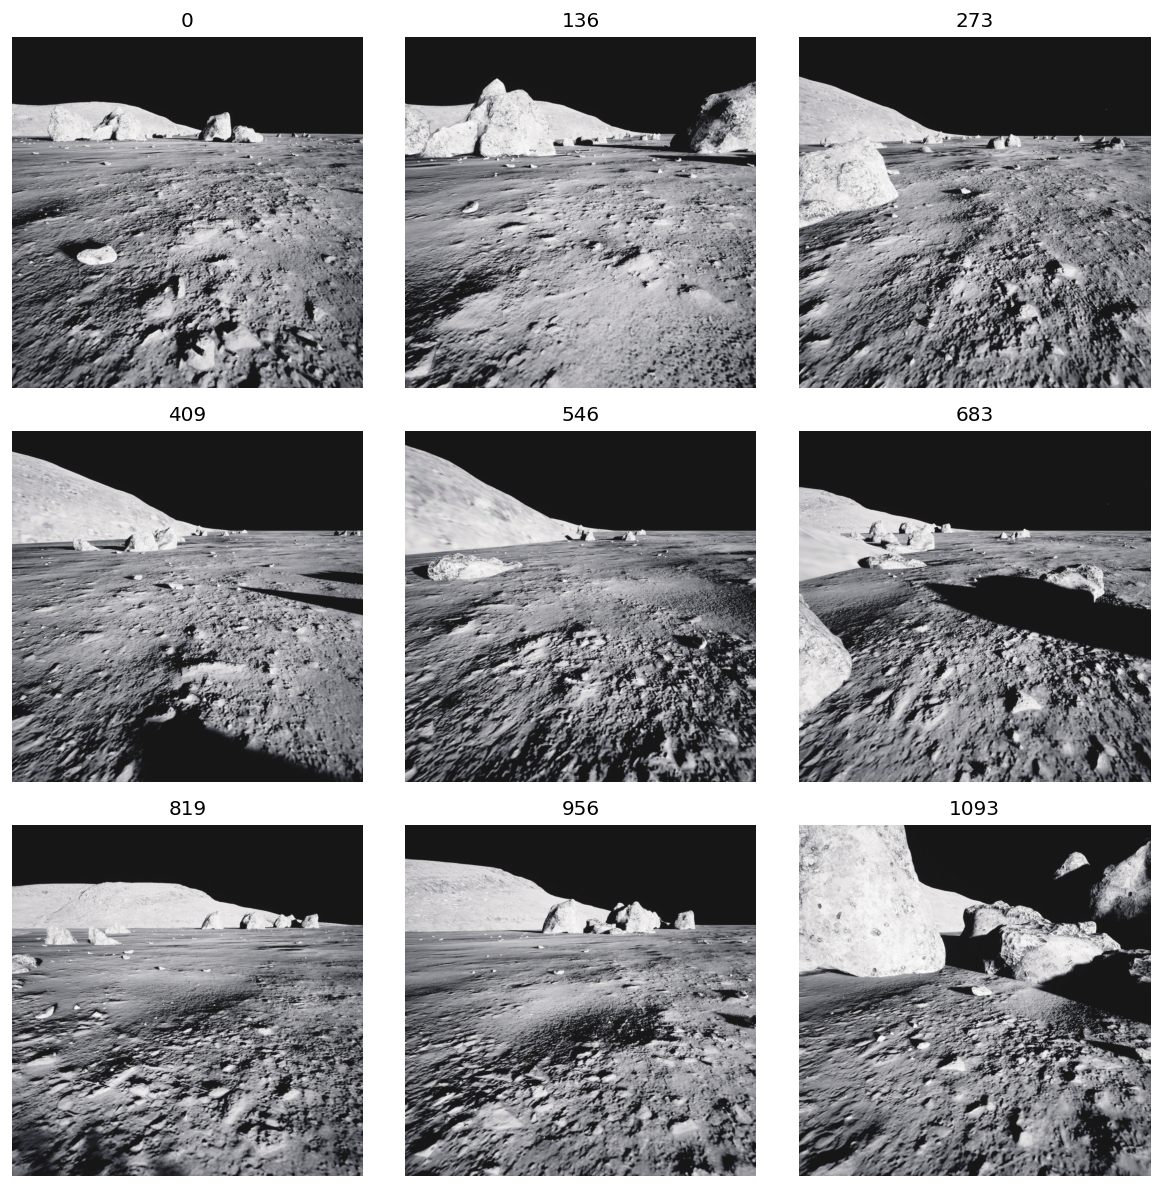

In [8]:
n_show = 9
idxs = np.linspace(0, len(color_ts) - 1, n_show, dtype=int)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(idxs):
    ts = int(color_ts[idx])
    img = ds.load_rgb(ts)
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(str(idx))
plt.tight_layout()
plt.show()

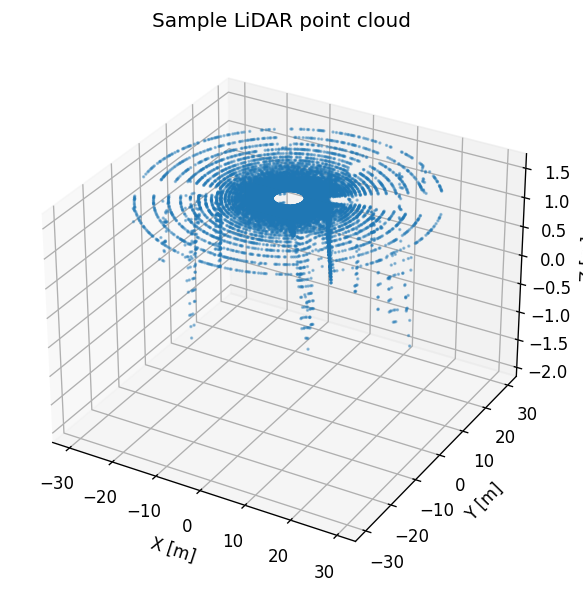

In [9]:
idx = len(color_ts) // 3
ts = int(color_ts[idx])
pts = ds.load_lidar(ts)
pts3 = pts[:, :3]
if pts3.shape[0] > 20000:
    sel = np.random.choice(pts3.shape[0], 20000, replace=False)
    pts3 = pts3[sel]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pts3[:, 0], pts3[:, 1], pts3[:, 2], s=1, alpha=0.4)
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")
ax.set_title("Sample LiDAR point cloud")
plt.tight_layout()
plt.show()

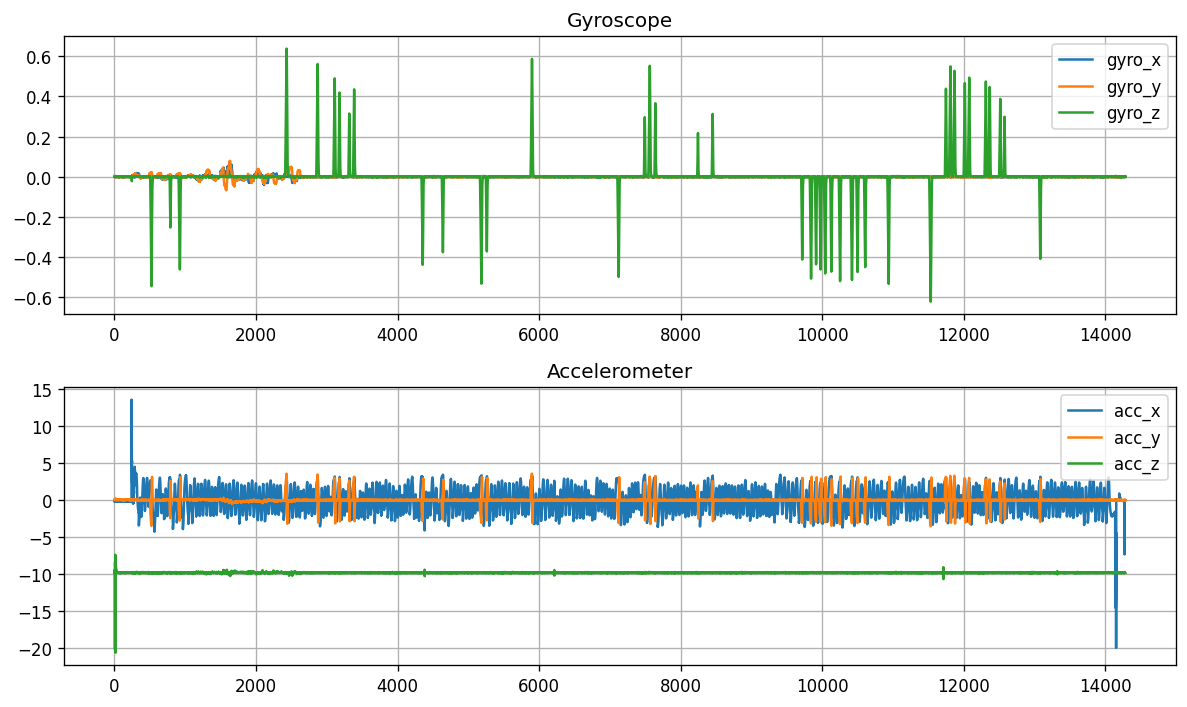

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(imu_data[:, 0], label="gyro_x")
plt.plot(imu_data[:, 1], label="gyro_y")
plt.plot(imu_data[:, 2], label="gyro_z")
plt.legend()
plt.grid(True)
plt.title("Gyroscope")
plt.subplot(2, 1, 2)
plt.plot(imu_data[:, 3], label="acc_x")
plt.plot(imu_data[:, 4], label="acc_y")
plt.plot(imu_data[:, 5], label="acc_z")
plt.legend()
plt.grid(True)
plt.title("Accelerometer")
plt.tight_layout()
plt.show()

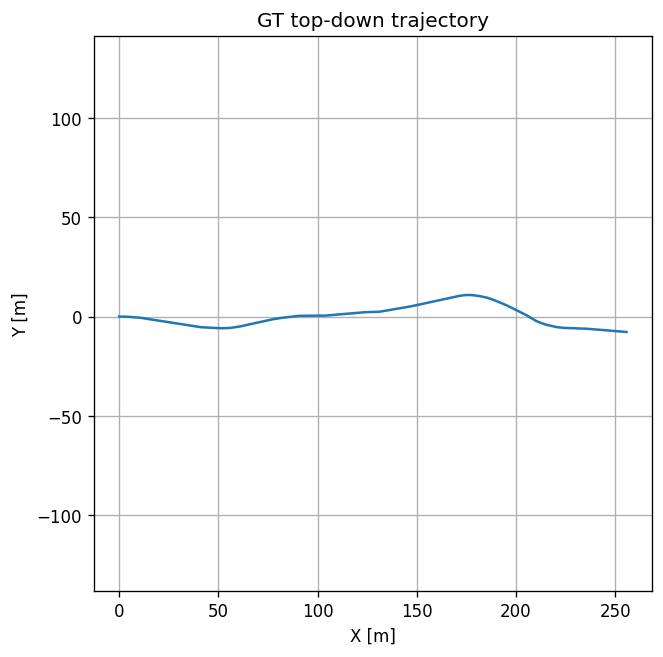

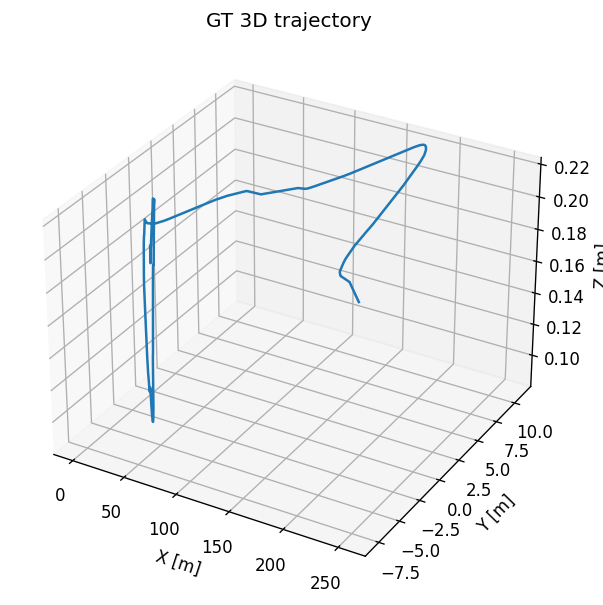

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(gt_xyz[:, 0], gt_xyz[:, 1])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("GT top-down trajectory")
plt.axis("equal")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(gt_xyz[:, 0], gt_xyz[:, 1], gt_xyz[:, 2])
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")
ax.set_title("GT 3D trajectory")
plt.show()